In [2]:
%load_ext autoreload
%autoreload 2
from hopfield import Hopfield
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [3]:
w, h = 100, 100

In [4]:
imgs = [load_img(file, color_mode="grayscale", target_size=(w,h), interpolation="nearest") for file in filter(lambda file: ".jpeg" in file, os.listdir())]

In [5]:
img_idx = 0
img = imgs[img_idx]

In [6]:
img_arr = img_to_array(img)

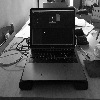

In [7]:
array_to_img(img_arr)

In [8]:
def preprocess(img):
    img_arr = img_to_array(img)
    img_arr = np.where(img_arr > 255/2, img_arr, 0)
    img_arr = np.where(img_arr <= 255/2, img_arr, 1)
    return img_arr

In [9]:
imgs_arr = np.array(list(map(preprocess, imgs)))

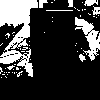

In [10]:
array_to_img(imgs_arr[img_idx])

In [11]:
data_tensor = tf.convert_to_tensor(imgs_arr.reshape((len(imgs_arr),-1)))

In [21]:
from time import time

In [31]:
model = Hopfield(data_tensor.shape[1])
start = time()
model.load(data_tensor)
print(time()-start)
print(model)
start = time()
model.train()
print(time()-start)

[2021-02-01 16:37:00,866] Creating model..
[2021-02-01 16:37:00,944] Loading data...


[2021-02-01 16:39:26,224] Training...


145.28000140190125
Hopfield model with 10000 neurons and 1 memories loaded (max. 1380) 
3.035383939743042


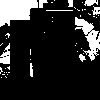

In [25]:
corrupted_arr = imgs_arr[0].copy()
#corrupted_arr[90:,10:]=1
corrupted_arr[20:90,10:30]=0
array_to_img(corrupted_arr)

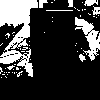

In [26]:
array_to_img(imgs_arr[0])

In [27]:
reconstructed_arr = model.reconstruct(corrupted_arr.reshape((1,-1))).numpy().reshape((w,h, 1))

[2021-02-01 15:53:26,694] Reconstructing...
[2021-02-01 15:53:26,706] Training...


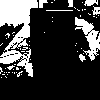

In [28]:
array_to_img(reconstructed_arr)

In [29]:
np.savetxt("X.txt", imgs_arr.reshape((1,-1)).astype(int), fmt="%d")

In [30]:
np.savetxt("corrupted.txt", corrupted_arr.reshape((1,-1)).astype(int), fmt="%d")

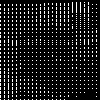

In [37]:
array_to_img(np.genfromtxt("X_out.csv").reshape((w,h,1)))

In [40]:
np.genfromtxt("X_out.csv")

array([-1., -1., -1., ..., -1., -1., -1.])